## Física Estadística 2021-2. Tarea 5
Prof. Juan Valentín Escobar Sotomayor
### Rizo Franco Samantha
#### Fecha de entrega: viernes 2 de noviembre de 2021

In [1]:
using Plots
using XLSX
using DelimitedFiles
using StatsBase
using ExcelFiles
using LaTeXStrings
using DataFrames
using Statistics
using Random
using Distributions

### Ejercicio 4.

### Sean dos sólidos de Einstein, con $N_A = 300$, $N_B = 200$ osciladores; y un número de paquetes de energía $q_{tot} = 100$ para distribuir entre los dos sólidos.

In [2]:
N_A=300
N_B=200
q_T=100
qA=collect(0:1:100)
qB=100 .-qA;

###  a) Genera una sola tabla de datos que contenga los paquetes de energía del sólido $A$, $q_A$; la multiplicidad $\Omega_A$; la entropía normalizada, $S_A / k$; y el inverso de la temperatura, $dS_A/d(U_a)$, con $U_a = \epsilon_0 q_A$ la energía del sistema $A$ y $\epsilon _0$ una constante. Haz lo mismo para el sólido $B$, con la $q_B$ correspondiente a cada $q_A$ tal que $q_A + q_B = q_{tot}$ (en la misma tabla, como se hizo en clase). Una vez hecho eso, agrega los valores para el sistema $A+B$ de multiplicidad total, $\Omega_{total}$; y de entropía total normalizada, $S_{total}/k$. 
Nota: No es necesario escribir los datos para TODAS las $q_A$'s posibles, pero sí para $q_a$'s cercanas a cero, cercanas a 100, y en intermedios interesantes.

Recordemos que la multiplicidad está dada por:
$$\Omega_A\approx\frac{(q+N)!}{q!N!}. $$

In [3]:
function Ω(q,N)
    multiplicidad = factorial(big(q+N-1))/(factorial(big(q))*factorial(big(N-1)))
    return multiplicidad
end

Ω (generic function with 1 method)

In [4]:
ΩA=Ω.(qA,N_A)
ΩB=Ω.(qB,N_B)
Ωtotal=ΩA.*ΩB;

La entroía está dada por:
$$ S=k_b\ln(\Omega) $$ 
Y normalizada es:
$$ \frac{S}{k_b}=\ln(\Omega) $$ 

In [5]:
function entropia(Ω)
    return log(Ω)
end

entropia (generic function with 1 method)

In [6]:
SA=entropia.(ΩA)
SB=entropia.(ΩB)
Stotal=SA.+SB;

El inverso de la temperatura, $dS_A/d(U_a)$, con $U_a = \epsilon_0 q_A$ está dado por:
$$\frac{1}{T}={\frac{k_b}{\epsilon}}{\frac{dln(\Omega)}{dq}} $$

In [7]:
function T_inverso(q,N)
    t=(log(N+q)-log(q))
    return t
end

T_inverso (generic function with 1 method)

In [8]:
TA=T_inverso.(qA,N_A)
TB=T_inverso.(qB,N_B);

Ahora tabulamos,

In [9]:
df=DataFrame(q_A=qA,Ω_A=ΩA,S_A=SA,T_A=TA,q_B=qB,Ω_B=ΩB,S_B=SB,T_B=TB,Ω_total=Ωtotal,S_total=Stotal)
show(df,allcols=true,allrows=true)

101×10 DataFrame
 Row │ q_A    Ω_A                                S_A                                T_A        q_B    Ω_B                                S_B                                T_B        Ω_total                            S_total                           
     │ Int64  BigFloat                           BigFloat                           Float64    Int64  BigFloat                           BigFloat                           Float64    BigFloat                           BigFloat                          
─────┼──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │     0      1.0                              0.0                              Inf          100      2.77216764217237649652225568…  187.5290220889908605250438715187…    1.09861  2.772167642172376496522255684217…  187.52

### b) Determina la entropía total para la cual las temperaturas inversas de $A$ y $B$ son las más cercanas entre sí.

In [10]:
l = abs.(TA.-TB)
    for i in 1:length(l)
        if l[i] == minimum(l)
            return (TA[i],TB[i],Stotal[i])
        end
end

(1.7917594692280554, 1.791759469228055, 264.4213267818922494055593845007900203578553795235138397202774274561917985517306)

El valor de la entropía total para la que las temperaturas inversas de $A$ y $B$ son las más cercanas entre sí es:
$$S_total=264.4213267818922494055593845007900203578553795235138397202774274561917985517306$$
Para las siguientes temperaturas inversas,
$$T^{-1}_A=1.7917594692280554,\quad\quad\quad T^{-1}_B=1.791759469228055$$

### c) Grafica $S_{total}$, $S_A$ y $S_B$ vs. $q_A$ (en una misma gráfica para poder comparar entre sí).

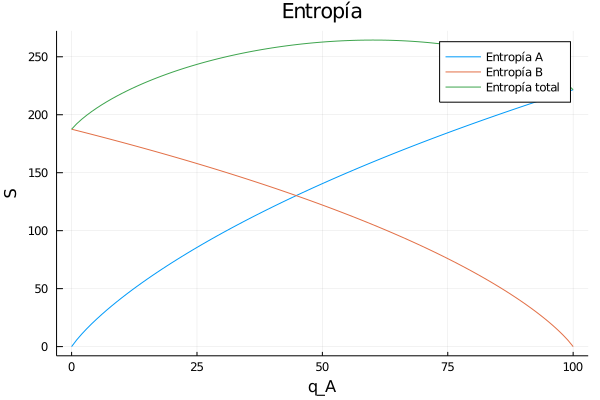

In [11]:
plot!(title="Entropía",xlabel="q_A",ylabel="S",label=false)
plot!(qA,SA,label="Entropía A")
plot!(qA,SB,label="Entropía B")
plot!(qA,Stotal,label="Entropía total")